In [14]:
import matplotlib.pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd
import time

In [2]:
url = 'http://www.gamestar.de/news/'

start = time.time()
driver = webdriver.Firefox()
driver.get(url)

clicks = 1800
wait = 1.5
for _ in range(clicks):
    try:
        driver.find_element_by_xpath('//a[@title="Mehr anzeigen"]').click()
    except:
        pass
    time.sleep(wait)
ende = time.time()
print('Dauer für {} Klicks mit jeweils {}s Wartezeit: {}'.format(clicks, wait, ende-start))

In [3]:
html = driver.page_source
driver.close()

In [4]:
bs = BeautifulSoup(html, 'lxml')

In [74]:
data = []
for elem in bs.find('span', {'class':'box-reload'}).findAll('div'):
    for div in elem.findAll('div'):
        if div.has_attr('class'):
            if div['class']==['col-xs-12', 'm-t-2', 'm-b-05']:
                day = div.get_text().split(' ')[-1]
            elif div['class']==['media', 'news-list', 'article-list', 'm-b-0']:
                time = div.find('span', {'class':'info news-info'}).get_text()
                text = div.find('a')['title']
                comments = div.find('span', {'class':'info-small'}).get_text()
                data.append([day+' '+time, text, int(comments)])
            else:
                pass
            
df = pd.DataFrame(data, columns=['Date', 'Title', 'Comments'])
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.set_index('Date')

def getMainTopic(x):
    return x.split(' - ')[0]

df['Topic'] = df['Title'].apply(lambda x: getMainTopic(x))
df.to_csv('build/Gamestar_News.csv')

(22356, 3)


,Title,Comments,Topic
Date,,,
2017-10-02 18:15:00,GameStar sucht... - Autor für Hardware-News un...,0,GameStar sucht...
2017-10-02 17:17:00,Call of Duty: WW2 - Leak deutet auf 10 Multipl...,5,Call of Duty: WW2
2017-10-02 17:04:00,Star Wars: Battlefront 2 - DLC-Inhalte in klei...,5,Star Wars: Battlefront 2
2017-10-02 16:50:00,Batman & Co. - Verabschiedet sich Warner vom D...,1,Batman & Co.
2017-10-02 16:33:00,Planetside 2 - Update Critical Mass krempelt d...,3,Planetside 2


In [15]:
df = pd.read_csv('build/Gamestar_News.csv', index_col='Date', parse_dates=True)
print(df.shape)
df.head()

(22356, 3)


,Title,Comments,Topic
Date,,,
2017-10-02 18:15:00,GameStar sucht... - Autor für Hardware-News un...,0,GameStar sucht...
2017-10-02 17:17:00,Call of Duty: WW2 - Leak deutet auf 10 Multipl...,5,Call of Duty: WW2
2017-10-02 17:04:00,Star Wars: Battlefront 2 - DLC-Inhalte in klei...,5,Star Wars: Battlefront 2
2017-10-02 16:50:00,Batman & Co. - Verabschiedet sich Warner vom D...,1,Batman & Co.
2017-10-02 16:33:00,Planetside 2 - Update Critical Mass krempelt d...,3,Planetside 2


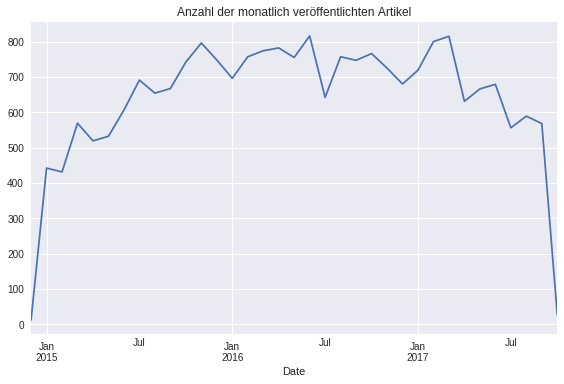

In [16]:
df.groupby(pd.TimeGrouper(freq='m'))['Title'].count().plot()
plt.title('Anzahl der monatlich veröffentlichten Artikel')
plt.tight_layout()
plt.savefig('build/Gamestar_News_Monatliche_Artikel.pdf', bbox_inches='tight')
plt.show()

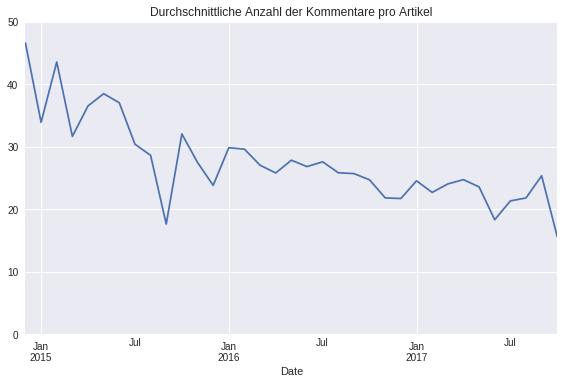

In [17]:
df.groupby(pd.TimeGrouper(freq='m'))['Comments'].mean().plot()
plt.title('Durchschnittliche Anzahl der Kommentare pro Artikel')
plt.ylim(0, 50)
plt.tight_layout()
plt.savefig('build/Gamestar_News_Monatliche_Kommentare_pro_Artikel.pdf', bbox_inches='tight')
plt.show()

In [18]:
df.sort_values('Comments', ascending=False).head(10)

,Title,Comments,Topic
Date,,,
2015-02-23 08:46:00,Star Citizen - Crowdfunding erreicht 73-Millio...,2885,Star Citizen
2015-10-04 13:26:00,Star Citizen - Streit zwischen The Escapist un...,554,Star Citizen
2015-04-09 07:11:00,US-Sanktionen - Blizzard sperrt Battle.net-Acc...,536,US-Sanktionen
2015-02-06 08:31:00,Nvidia Geforce GTX 970 - Der aktuelle Stand de...,498,Nvidia Geforce GTX 970
2016-01-06 17:18:00,"Oculus Rift - Preis des VR-Geräts steht fest, ...",472,Oculus Rift
2015-05-08 17:16:00,The Witcher 3: Wild Hunt - Möglicher Grafik-Do...,453,The Witcher 3: Wild Hunt
2015-05-15 11:57:00,"The Witcher 3 - Neue Details zum Downgrade, Ko...",443,The Witcher 3
2016-02-23 10:54:00,Strafanzeige gegen Mark Zuckerberg - Facebook-...,401,Strafanzeige gegen Mark Zuckerberg
2015-09-30 21:16:00,Star Citizen - 1.000 Dollar teures Raumschiff-...,396,Star Citizen


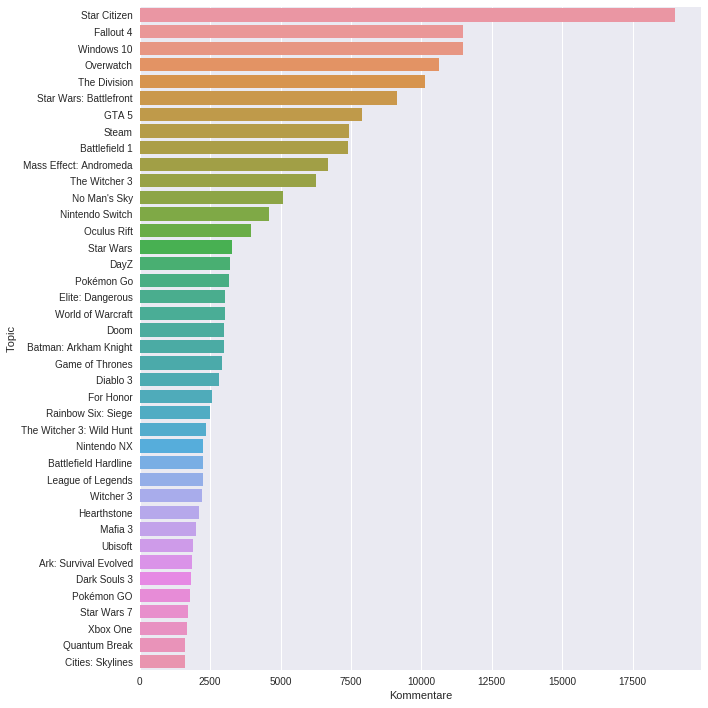

In [19]:
n = 40
plt.figure(figsize=(10, n/4))
sns.barplot(data=df.groupby('Topic').sum().sort_values('Comments', ascending=False).head(n).reset_index(), x='Comments', y='Topic')
plt.xlabel('Kommentare')
plt.tight_layout()
plt.savefig('build/Gamestar_News_Top_Kommentierte_Themen.pdf', bbox_inches='tight')
plt.show()

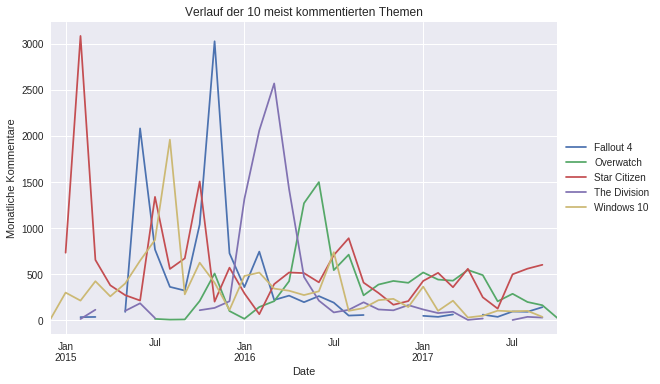

In [21]:
n = 10
best_topics = df.groupby('Topic').sum().sort_values('Comments', ascending=False).head(5).index
df[df['Topic'].isin(best_topics)].groupby([pd.TimeGrouper(freq='m'), 'Topic']).agg({'Comments':'sum'}).reset_index().pivot(index='Date', columns='Topic')['Comments'].plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Verlauf der {} meist kommentierten Themen'.format(n))
plt.ylabel('Monatliche Kommentare')
plt.tight_layout()
plt.savefig('build/Gamestar_News_Verlauf_Monatliche_Top_Artikel.pdf', bbox_inches='tight')
plt.show()

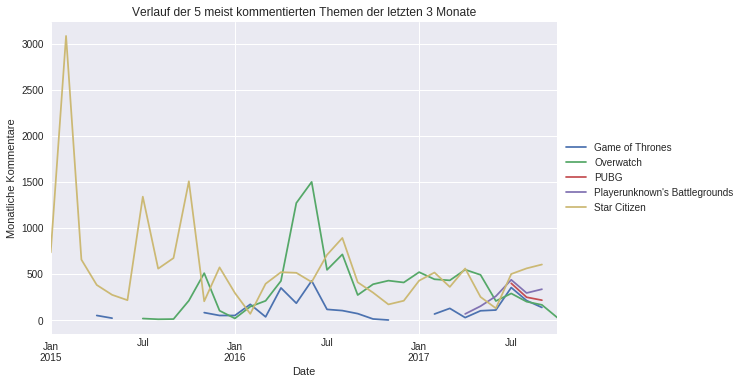

In [23]:
n = 5
best_topics = df.loc[:'2017-07-01'].groupby('Topic').sum().sort_values('Comments', ascending=False).head(n).index
df[df['Topic'].isin(best_topics)].groupby([pd.TimeGrouper(freq='m'), 'Topic']).agg({'Comments':'sum'}).reset_index().pivot(index='Date', columns='Topic')['Comments'].plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Verlauf der {} meist kommentierten Themen der letzten 3 Monate'.format(n))
plt.ylabel('Monatliche Kommentare')
plt.tight_layout()
plt.savefig('build/Gamestar_News_Verlauf_Monatliche_Aktuelle_Top_Artikel.pdf', bbox_inches='tight')
plt.show()